In [135]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from WiSARD import WiSARD
import numpy as np
import pandas as pd
import math
import sys
import random
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

def thermometer(word_vec, min_=-1.0, max_=1.0, n=20):
    vec = []
    for v in word_vec:
        t = (max_ - min_)/n
        rang = []
        for i in np.arange(min_ + t, max_, t):
            if v > i:
                rang.append(1)
            else:
                break
        rang.extend([0] * (n-len(rang)-1))
        vec.extend(rang)
    return np.array(vec)

In [ ]:
model = KeyedVectors.load_word2vec_format('../glove.6B.50d.word2vec.txt')

In [257]:
df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

X = []
y = []
for file in df:
    for i in range(2000):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        doc = df[file].iloc[i]['content']
        v = np.array([0] * 50)
        w = doc.split(' ')
        for j in w:
            if j in model:
                v = np.add(v, model[j])
        v = v / np.linalg.norm(v) # normalized
        X.append(thermometer(v))
        y.append(file)

X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        #data.append(df[file].iloc[i]['title'])
        #data.append(df[file].iloc[i]['content'])
        doc = df[file].iloc[i]['content']
        v = np.array([0] * 50)
        w = doc.split(' ')
        for j in w:
            if j in model:
                v = np.add(v, model[j])
        v = v / np.linalg.norm(v) # normalized
        X_test.append(thermometer(v))
        y_test.append(file)

In [258]:
len(y_test)

3000

In [242]:
#from sklearn.model_selection import KFold
#from sklearn.utils import shuffle
#Xnp = np.array(X)
#ynp = np.array(y)
#Xnp, ynp = shuffle(Xnp, ynp)
#kf = KFold(n_splits=5, shuffle=True)
#for train_index, test_index in kf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = Xnp[train_index], Xnp[test_index]
#    y_train, y_test = ynp[train_index], ynp[test_index]

In [259]:
w = WiSARD(8, seed=random.randint(0, 2**32-1), ignore_zero_addr=True)

In [262]:
#for i in range(len(X)):
#    w.fit([X[i]], [y[i]])
w.fit(X, y)

In [263]:
result = w.predict(X_test)

Confusion matrix, without normalization
[[  4   1   0  42   0 453]
 [  0  13   0   7   0 480]
 [  0   6   1  20   0 473]
 [  0   1   0  67   0 432]
 [  0   0   0  33  18 449]
 [  0   0   0   4   0 496]]


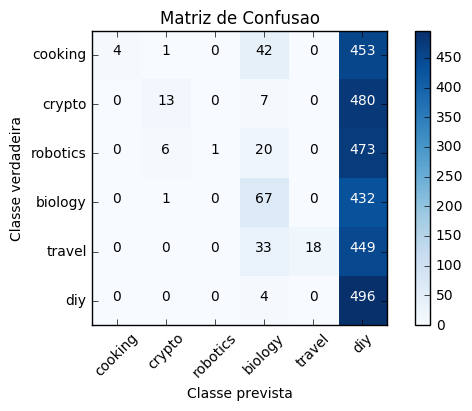

In [264]:
# import confusion matrix function
from sklearn.metrics import confusion_matrix
# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()